In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg

In [2]:
def rosen(x, y):
    return 100*(y - x**2)**2 + (1-x)**2

def rosen_der(x, y):
    der = np.zeros(2)
    der[0] = -400*x*(y-x**2) - 2*(1-x)
    der[1] = 200*(y-x**2)
    return der

def rosen_hess(x, y):
    H = np.array([[1200*x**2 - 400*y + 2, -400*x],
                  [-400*x, 200]])
    return H

#### 1. Rosenbrock Function

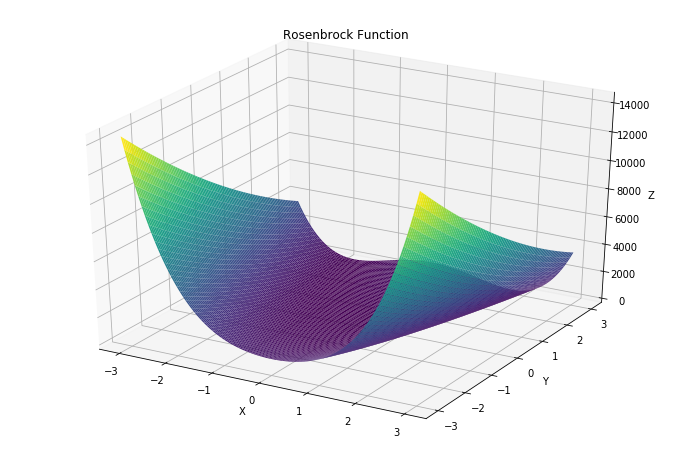

In [3]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')
n = 100

x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X, Y = np.meshgrid(x,y)
Z = rosen(X, Y)

ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rosenbrock Function')
plt.show()

#### 2. Gradient Descent

In [4]:
class GradientDescent:
    def __init__(self, grad, eps, tol):
        self.eps = eps
        self.tol = tol
        self.grad = grad
        
    def __Next(self, p):
        x, y = p
        x, y = (x, y) - self.eps*self.grad(x, y)
        return x, y
    
    def Optim(self, p, n):
        result = []
        result.append(p)
        for i in range(n):
            p = self.__Next(p)
            result.append(p)
        result = np.asarray(result)
        return result    

In [5]:
eps = 0.001
x0, y0 = (1,4)
tol = 1e-5

gd = GradientDescent(rosen_der, eps, tol)
result = gd.Optim((x0,y0), 20000)

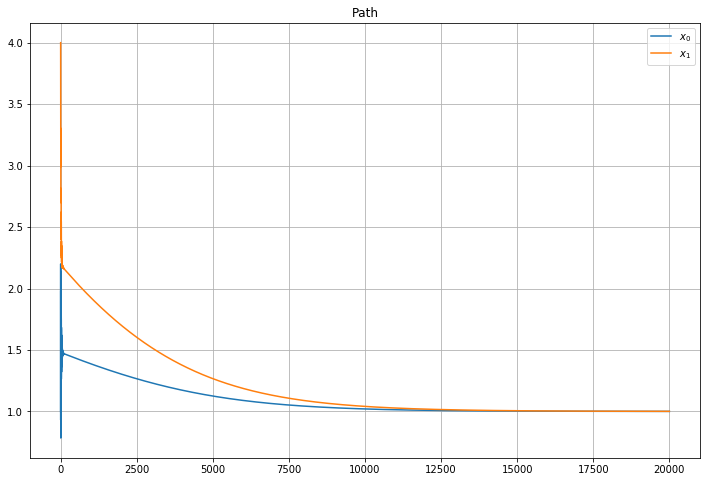

In [6]:
plt.figure(figsize=(12,8))
plt.plot(result[:,0], label=r'$x_0$')
plt.plot(result[:,1], label=r'$x_1$')
plt.title('Path')
plt.legend()
plt.grid()
plt.show()

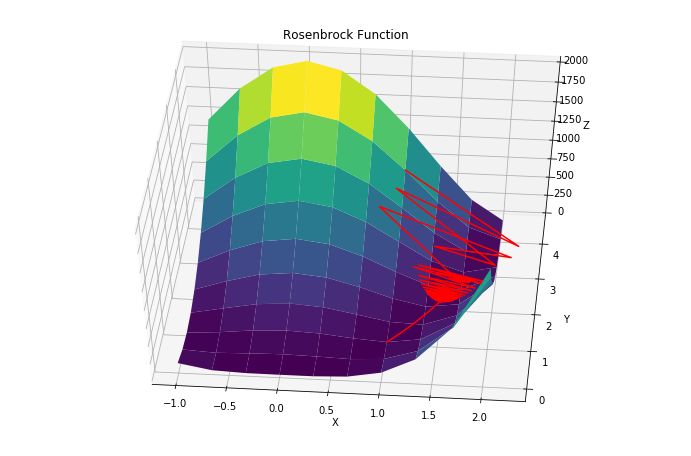

Optimization Result
x = 1.00038
y = 1.00077


In [7]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')

# Path
xp = result[:,0]
yp = result[:,1]
zp = rosen(xp, yp)
#ax.scatter3D(x,y,z)
ax.plot3D(xp,yp,zp, c='red')

# Surface
n = 10
x = np.linspace(-1,2,n)
y = np.linspace(0,4.5,n)
X, Y = np.meshgrid(x,y)
Z = rosen(X, Y)
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rosenbrock Function')
ax.view_init(50,-85)
plt.show()

print('Optimization Result')
print('x = {:.5f}\ny = {:.5f}'.format(xp[-1], yp[-1]))

#### 3. Linear Regression

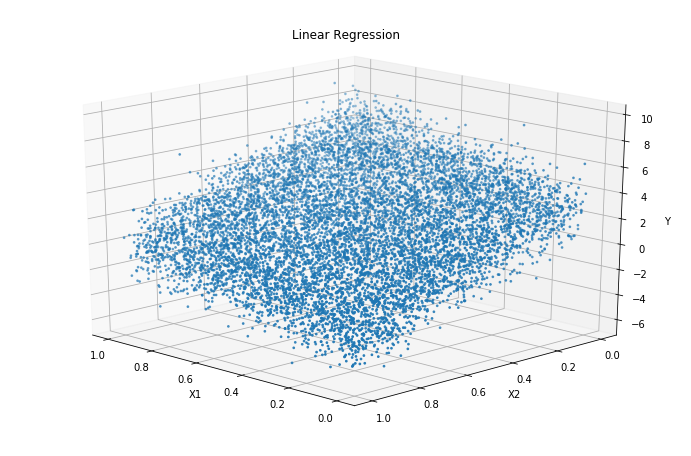

In [8]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')

np.random.seed(180617)
n = 10000
X = np.hstack((np.ones((n,1)),np.random.rand(n,2)))
y = 3*X[:,0] + 4*X[:,1] - 7*X[:,2] + 1.2*np.random.randn(n)

ax.scatter3D(X[:,1], X[:,2], y, s=3)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Linear Regression')
ax.view_init(20,135)
plt.show()

#### 4. Formula

In [9]:
Xm = np.asmatrix(X)
ym = np.asmatrix(y).T
beta = np.asarray((Xm.T*Xm).I*Xm.T*ym).reshape(-1)

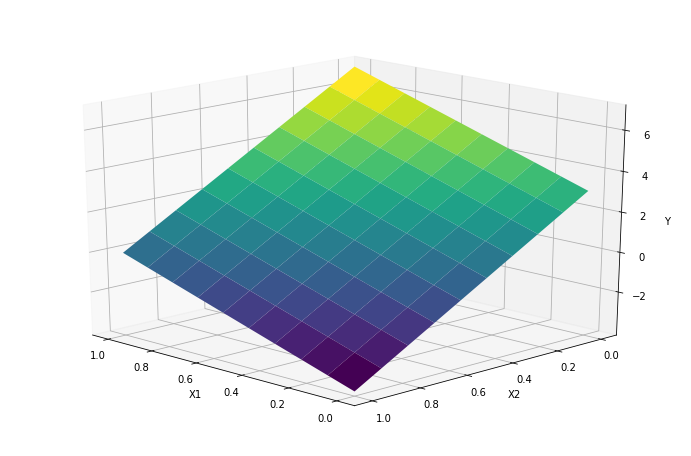

In [10]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111,projection='3d')

# Surface
n = 10
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
A, B = np.meshgrid(x1,x2)
Z = beta[0]+beta[1]*A+beta[2]*B
ax.plot_surface(A,B,Z, rstride=1, cstride=1, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.view_init(20,135)
plt.show()

#### 5. Least-Square Optimization (Linear Regression)

In [11]:
class LeastSquare:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def f(self, X, p):
        y = p[0]*X[:,0]+p[1]*X[:,1]+p[2]*X[:,2]
        return y
        
    def Jacobian(self, X, p):
        J = np.zeros((len(X),len(p)))
        J[:,0] = -1
        J[:,1] = -X[:,1]
        J[:,2] = -X[:,2]
        return J
        
    def __Next(self, beta, method, mu, eps):
        beta = np.asmatrix(beta).reshape(-1,1)
        r = np.asmatrix(self.y - self.f(self.X, beta)).reshape(-1,1)
        J = np.asmatrix(self.Jacobian(self.X, beta))
        
        ## Optimization Methods
        if method=='GradientDescent':
            beta = beta - 2*eps*J.T*r
        elif method=='GaussNewton':
            beta = beta - (J.T*J).I*J.T*r
        elif method=='Levenberg':
            beta = beta - (J.T*J+mu*np.identity(len(beta))).I*J.T*r
        elif method=='LevenbergMarquardt':
            beta = beta - (J.T*J+mu*np.diag(J.T*J)*np.identity(len(beta))).I*J.T*r
        else:
            print('에러입니다.')
        
        beta = np.asarray(beta).reshape(-1)
        return beta
    
    def Optim(self, p, n, method='GradientDescent', mu=1, eps=1e-4):
        result = []
        result.append(p)
        for i in range(n):
            p = self.__Next(p, method, mu, eps)
            result.append(p)
        result = np.asarray(result)
        return result    

Gradient Descent    : beta0 = 0.19272, beta1 = 5.60589, beta2 = -3.28476
Gauss-Newton        : beta0 = 3.04762, beta1 = 3.94371, beta2 = -7.01307
Levenberg           : beta0 = 3.04762, beta1 = 3.94371, beta2 = -7.01307
Levenberg-Marquardt : beta0 = 3.04762, beta1 = 3.94371, beta2 = -7.01307


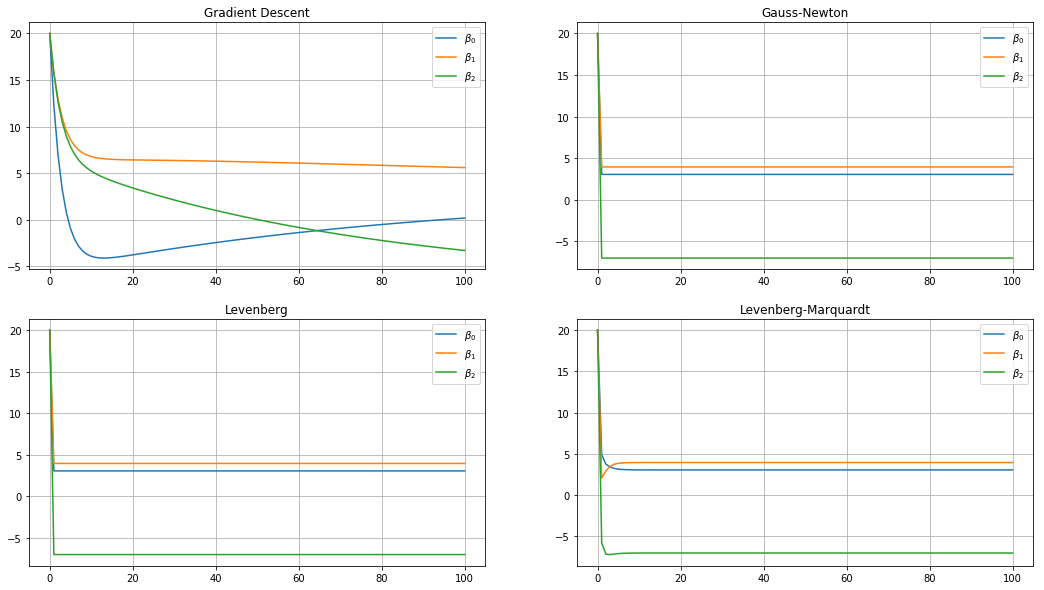

In [12]:
eps = 1e-5
mu = 0.1
gd = LeastSquare(X, y)
beta0 = [20, 20, 20]
n = 100

optimGD = gd.Optim(beta0, n, 'GradientDescent', eps=eps)
optimGN = gd.Optim(beta0, n, 'GaussNewton')
optimL = gd.Optim(beta0, n, 'Levenberg', mu=mu)
optimLM = gd.Optim(beta0, n, 'LevenbergMarquardt', mu=mu)

plt.figure(figsize=(18,10))

plt.subplot(221)
plt.plot(optimGD[:,0], label=r'$\beta_0$')
plt.plot(optimGD[:,1], label=r'$\beta_1$')
plt.plot(optimGD[:,2], label=r'$\beta_2$')
plt.grid()
plt.legend()
plt.title('Gradient Descent')
print('{:<19} : beta0 = {:.5f}, beta1 = {:.5f}, beta2 = {:.5f}'.format('Gradient Descent', optimGD[-1][0], optimGD[-1][1], optimGD[-1][2]))

plt.subplot(222)
plt.plot(optimGN[:,0], label=r'$\beta_0$')
plt.plot(optimGN[:,1], label=r'$\beta_1$')
plt.plot(optimGN[:,2], label=r'$\beta_2$')
plt.grid()
plt.legend()
plt.title('Gauss-Newton')
print('{:<19} : beta0 = {:.5f}, beta1 = {:.5f}, beta2 = {:.5f}'.format('Gauss-Newton', optimGN[-1][0], optimGN[-1][1], optimGN[-1][2]))

plt.subplot(223)
plt.plot(optimL[:,0], label=r'$\beta_0$')
plt.plot(optimL[:,1], label=r'$\beta_1$')
plt.plot(optimL[:,2], label=r'$\beta_2$')
plt.grid()
plt.legend()
plt.title('Levenberg')
print('{:<19} : beta0 = {:.5f}, beta1 = {:.5f}, beta2 = {:.5f}'.format('Levenberg', optimL[-1][0], optimL[-1][1], optimL[-1][2]))

plt.subplot(224)
plt.plot(optimLM[:,0], label=r'$\beta_0$')
plt.plot(optimLM[:,1], label=r'$\beta_1$')
plt.plot(optimLM[:,2], label=r'$\beta_2$')
plt.grid()
plt.legend()
plt.title('Levenberg-Marquardt')
print('{:<19} : beta0 = {:.5f}, beta1 = {:.5f}, beta2 = {:.5f}'.format('Levenberg-Marquardt', optimLM[-1][0], optimLM[-1][1], optimLM[-1][2]))

plt.show()

#### 6 Non-Linear Regression

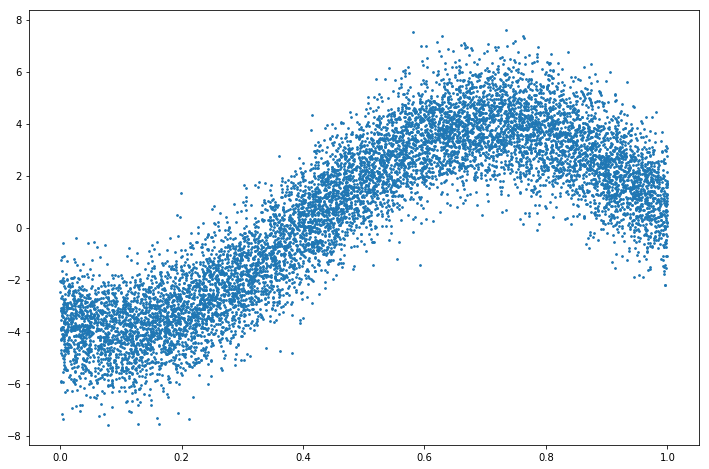

In [13]:
plt.figure(figsize=(12,8))

np.random.seed(180617)
n = 10000
X = np.random.rand(n,1)
y = 4*np.sin(5*X[:,0] - 2) + 1.2*np.random.randn(n)

plt.scatter(X[:,0], y, s=3)
plt.show()

In [14]:
class LeastSquare:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def f(self, X, p):
        y = p[0]*np.sin(p[1]*X[:,0]+p[2])
        return y
        
    def Jacobian(self, X, p):
        J = np.zeros((len(X),len(p)))
        J[:,0] = -np.sin(p[1]*X[:,0]+p[2])
        J[:,1] = -X[:,0]*p[0]*np.cos(p[1]*X[:,0]+p[2])
        J[:,2] = -p[0]*np.cos(p[1]*X[:,0]+p[2])
        
        return J
        
    def __Next(self, beta, method, mu, eps):
        J = np.asmatrix(self.Jacobian(self.X, beta))
        r = np.asmatrix(self.y - self.f(self.X, beta)).reshape(-1,1)
        beta = np.asmatrix(beta).reshape(-1,1)
        
        ## Optimization Methods
        if method=='GradientDescent':
            beta = beta - 2*eps*J.T*r
        elif method=='GaussNewton':
            beta = beta - (J.T*J).I*J.T*r
        elif method=='Levenberg':
            beta = beta - (J.T*J+mu*np.identity(len(beta))).I*J.T*r
        elif method=='LevenbergMarquardt':
            beta = beta - (J.T*J+mu*np.diag(J.T*J)*np.identity(len(beta))).I*J.T*r
        else:
            print('에러입니다.')
        
        beta = np.asarray(beta).reshape(-1)
        return beta
    
    def Optim(self, p, n, method='GradientDescent', mu=1, eps=1e-4):
        result = []
        result.append(p)
        for i in range(n):
            p = self.__Next(p, method, mu, eps)
            result.append(p)
        result = np.asarray(result)
        return result

Gradient Descent    : beta0 = 4.01179, beta1 = 4.97202, beta2 = -1.97831
Gauss-Newton        : beta0 = 4.01179, beta1 = 4.97202, beta2 = -1.97831
Levenberg           : beta0 = 4.01179, beta1 = 4.97202, beta2 = -1.97831
Levenberg-Marquardt : beta0 = 4.01179, beta1 = 4.97202, beta2 = -1.97831


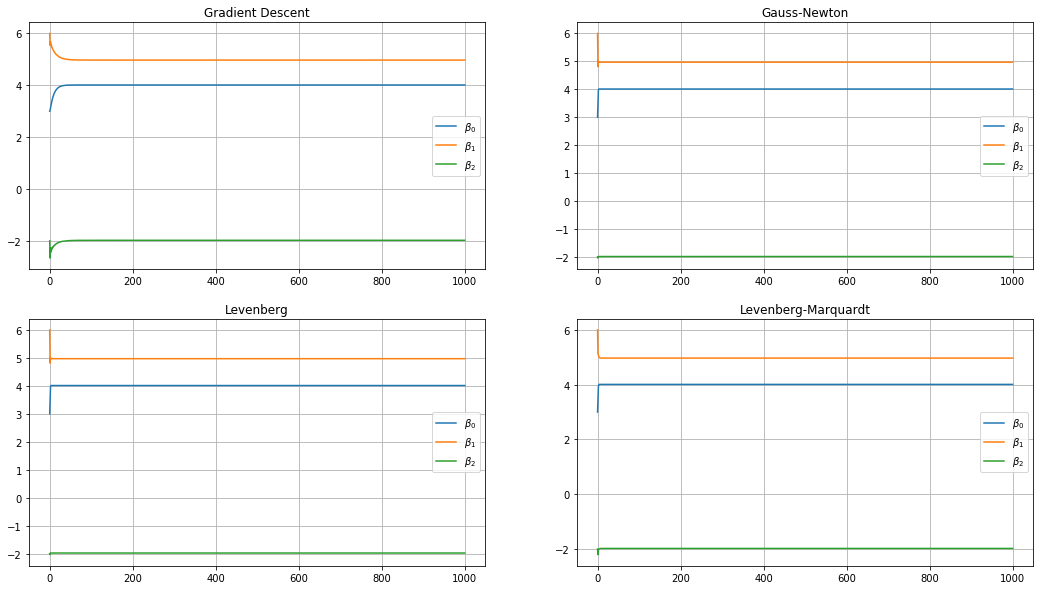

In [15]:
eps = 1e-5
mu = 0.1
gd = LeastSquare(X, y)
beta0 = [3, 6, -2]
n = 1000

optimGD = gd.Optim(beta0, n, 'GradientDescent', eps=eps)
optimGN = gd.Optim(beta0, n, 'GaussNewton')
optimL = gd.Optim(beta0, n, 'Levenberg', mu=mu)
optimLM = gd.Optim(beta0, n, 'LevenbergMarquardt', mu=mu)

plt.figure(figsize=(18,10))

plt.subplot(221)
plt.plot(optimGD[:,0], label=r'$\beta_0$')
plt.plot(optimGD[:,1], label=r'$\beta_1$')
plt.plot(optimGD[:,2], label=r'$\beta_2$')
plt.grid()
plt.legend()
plt.title('Gradient Descent')
print('{:<19} : beta0 = {:.5f}, beta1 = {:.5f}, beta2 = {:.5f}'.format('Gradient Descent', optimGD[-1][0], optimGD[-1][1], optimGD[-1][2]))

plt.subplot(222)
plt.plot(optimGN[:,0], label=r'$\beta_0$')
plt.plot(optimGN[:,1], label=r'$\beta_1$')
plt.plot(optimGN[:,2], label=r'$\beta_2$')
plt.grid()
plt.legend()
plt.title('Gauss-Newton')
print('{:<19} : beta0 = {:.5f}, beta1 = {:.5f}, beta2 = {:.5f}'.format('Gauss-Newton', optimGN[-1][0], optimGN[-1][1], optimGN[-1][2]))

plt.subplot(223)
plt.plot(optimL[:,0], label=r'$\beta_0$')
plt.plot(optimL[:,1], label=r'$\beta_1$')
plt.plot(optimL[:,2], label=r'$\beta_2$')
plt.grid()
plt.legend()
plt.title('Levenberg')
print('{:<19} : beta0 = {:.5f}, beta1 = {:.5f}, beta2 = {:.5f}'.format('Levenberg', optimL[-1][0], optimL[-1][1], optimL[-1][2]))

plt.subplot(224)
plt.plot(optimLM[:,0], label=r'$\beta_0$')
plt.plot(optimLM[:,1], label=r'$\beta_1$')
plt.plot(optimLM[:,2], label=r'$\beta_2$')
plt.grid()
plt.legend()
plt.title('Levenberg-Marquardt')
print('{:<19} : beta0 = {:.5f}, beta1 = {:.5f}, beta2 = {:.5f}'.format('Levenberg-Marquardt', optimLM[-1][0], optimLM[-1][1], optimLM[-1][2]))

plt.show()

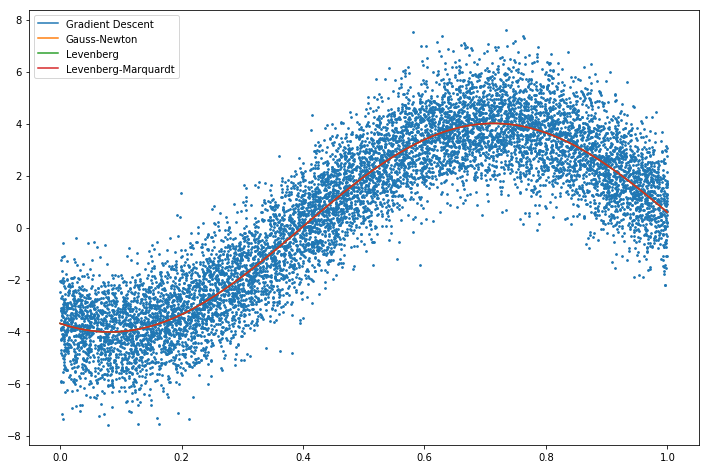

In [19]:
plt.figure(figsize=(12,8))

np.random.seed(180617)
n = 10000
X = np.random.rand(n,1)
y = 4*np.sin(5*X[:,0] - 2) + 1.2*np.random.randn(n)
plt.scatter(X, y, s=3)

x = np.linspace(0,1,100)
names = ['Gradient Descent', 'Gauss-Newton', 'Levenberg', 'Levenberg-Marquardt']
for i, b in enumerate([optimGD, optimGN, optimL, optimLM]):
    beta1 = b[-1][0], b[-1][1], b[-1][2]
    z = beta1[0]*np.sin(beta1[1]*x+beta1[2])
    plt.plot(x,z, label=names[i])
    
plt.legend()
plt.show()